# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.4.3
* IPython 4.0.1
* pandas 0.17.1
* matplotlib 1.5.0
* netcdf4 1.2.1
* siphon 0.3.2

It should work with other Python and Pandas versions. It requires pvlib >= 0.2.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'US/Arizona'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

## GFS (0.5 deg)

In [3]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [4]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

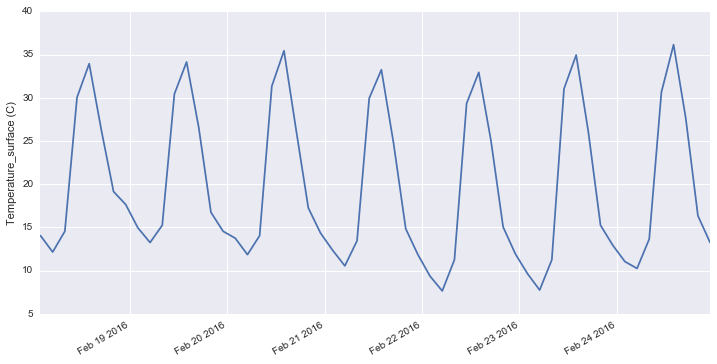

In [5]:
data['temperature'].plot()
plt.ylabel(fm.var_stdnames['temperature'] + ' (%s)' % fm.var_units['temperature'])

In [6]:
cloud_vars = ['total_clouds','low_clouds','mid_clouds','high_clouds']

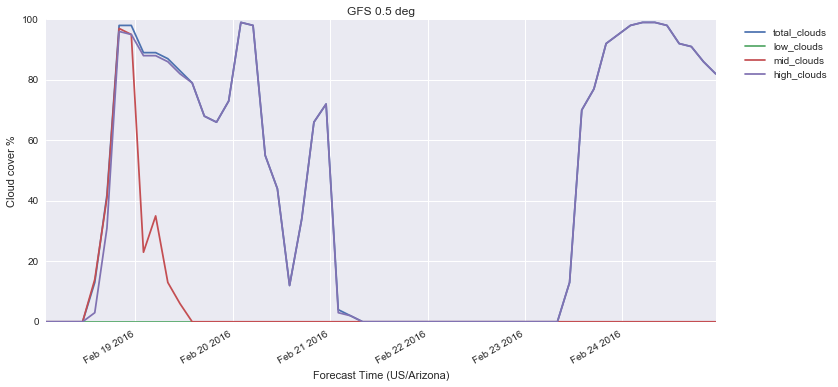

In [7]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [8]:
total_cloud_cover = data['total_clouds']

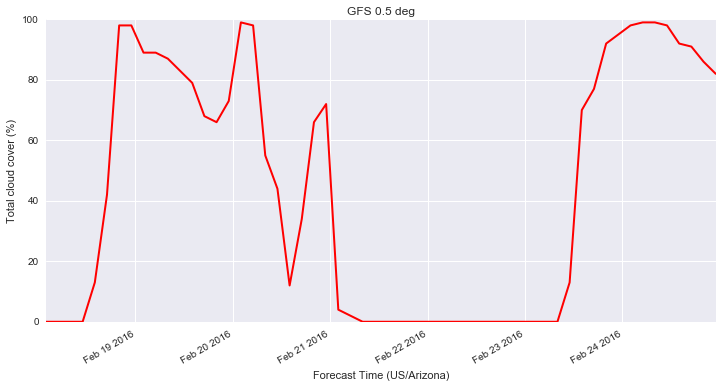

In [9]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.var_units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')

## GFS (0.25 deg)

In [10]:
# GFS model at 0.25 degree resolution
fm = GFS(resolution='quarter')

In [11]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

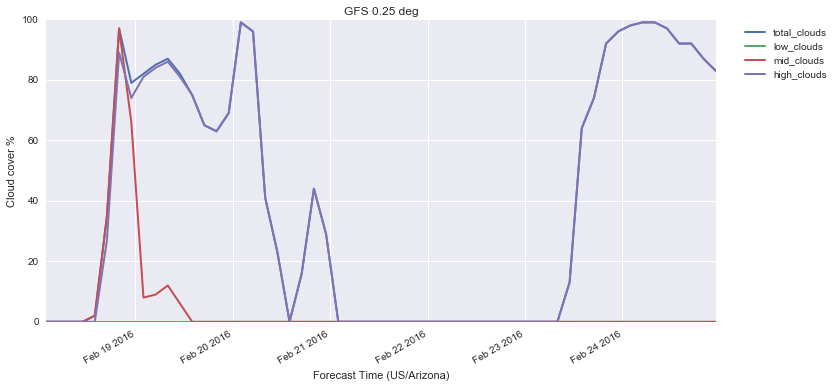

In [12]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [13]:
data

,temperature,wind_speed,total_clouds,low_clouds,mid_clouds,high_clouds,dhi,dni,ghi
2016-02-18 02:00:00-07:00,13.649994,3.678220,0,0,0,0,0.000000,0.000000e+00,0.000000
2016-02-18 05:00:00-07:00,11.649994,2.452264,0,0,0,0,0.000000,0.000000e+00,0.000000
2016-02-18 08:00:00-07:00,14.350006,3.644078,0,0,0,0,59.221272,3.013900e+02,115.053768
2016-02-18 11:00:00-07:00,29.750000,5.171779,0,0,0,0,95.147829,8.772437e+02,663.238722
2016-02-18 14:00:00-07:00,33.649994,6.112871,2,0,2,0,101.088350,8.632626e+02,678.543892
2016-02-18 17:00:00-07:00,26.350006,5.179286,35,0,35,27,92.133615,6.884327e+01,108.420245
2016-02-18 20:00:00-07:00,19.050018,3.219223,97,0,97,89,0.000000,0.000000e+00,0.000000
2016-02-18 23:00:00-07:00,15.149994,1.597780,79,0,66,74,0.000000,0.000000e+00,0.000000
2016-02-19 02:00:00-07:00,13.950012,1.608229,82,0,8,81,0.000000,0.000000e+00,0.000000
2016-02-19 05:00:00-07:00,12.750000,3.015295,85,0,9,84,0.000000,0.000000e+00,0.000000


## NAM

In [14]:
fm = NAM()

In [15]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

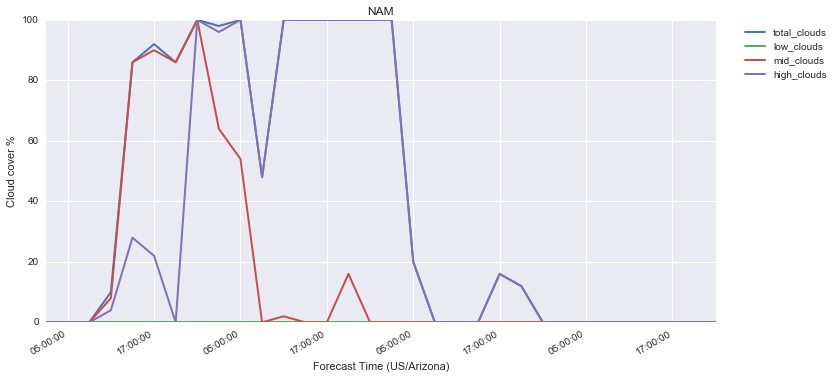

In [16]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0))

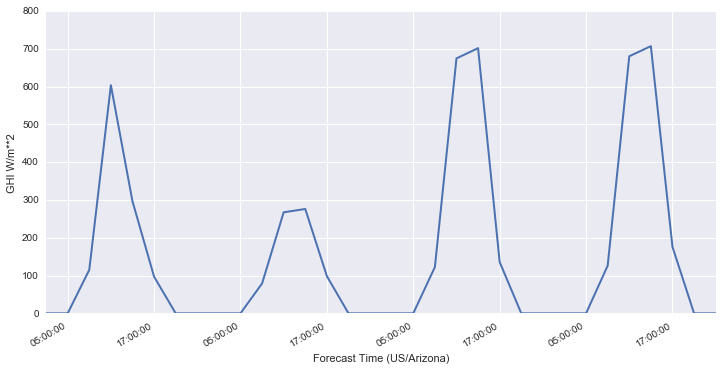

In [17]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

In [18]:
data

,temperature,wind_speed,total_clouds,low_clouds,mid_clouds,high_clouds,dhi,dni,ghi
2016-02-18 02:00:00-07:00,9.255585,4.392399,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 05:00:00-07:00,6.757660,2.515406,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 08:00:00-07:00,8.902466,4.108572,0,0,0,0,59.221272,301.390004,115.053768
2016-02-18 11:00:00-07:00,30.105804,5.105513,10,0,8,4,120.703367,745.701147,603.609133
2016-02-18 14:00:00-07:00,34.611176,6.361901,86,0,86,28,264.841808,47.256142,296.452492
2016-02-18 17:00:00-07:00,27.297424,5.478108,92,0,90,22,97.018802,0.011307,97.021477
2016-02-18 20:00:00-07:00,18.592285,2.897233,86,0,86,0,0.000000,0.000000,0.000000
2016-02-18 23:00:00-07:00,15.308075,3.443801,100,0,100,100,0.000000,0.000000,0.000000
2016-02-19 02:00:00-07:00,13.960327,3.564613,98,0,64,96,0.000000,0.000000,0.000000
2016-02-19 05:00:00-07:00,12.385834,3.473563,100,0,54,100,0.000000,0.000000,0.000000


## NDFD

In [19]:
fm = NDFD()

In [20]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

In [21]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed']

(0, 100)

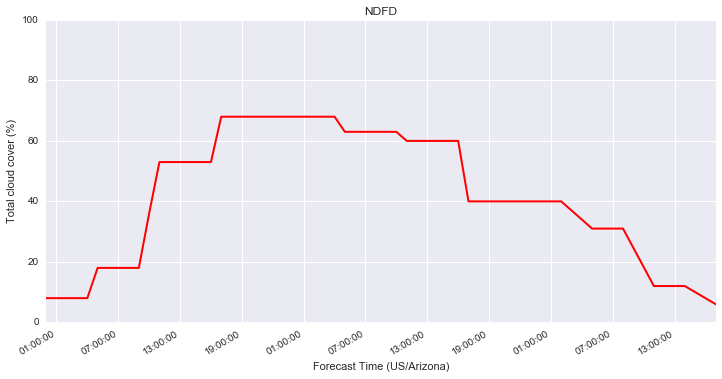

In [22]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.var_units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100)

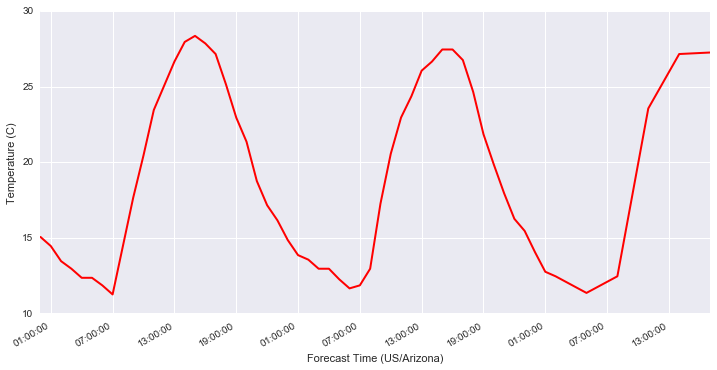

In [23]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.var_units['temperature'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

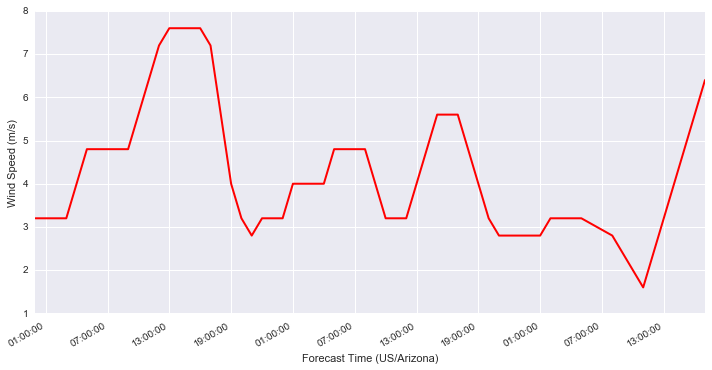

In [24]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.var_units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

In [25]:
data

,temperature,wind_speed,total_clouds,low_clouds,mid_clouds,high_clouds,dhi,dni,ghi
2016-02-18 00:00:00-07:00,15.050018,3.2,8,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 01:00:00-07:00,14.450012,3.2,8,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 02:00:00-07:00,13.450012,3.2,8,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 03:00:00-07:00,12.950012,3.2,8,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 04:00:00-07:00,12.350006,4.0,8,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 05:00:00-07:00,12.350006,4.8,18,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 06:00:00-07:00,11.850006,4.8,18,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 07:00:00-07:00,11.250000,4.8,18,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000
2016-02-18 08:00:00-07:00,14.450012,4.8,18,NaN,NaN,NaN,70.068461,1.062089e+02,89.743660
2016-02-18 09:00:00-07:00,17.649994,4.8,18,NaN,NaN,NaN,111.475421,3.772350e+02,253.099695


## RAP

In [26]:
fm = RAP(resolution=20)

In [27]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

In [28]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

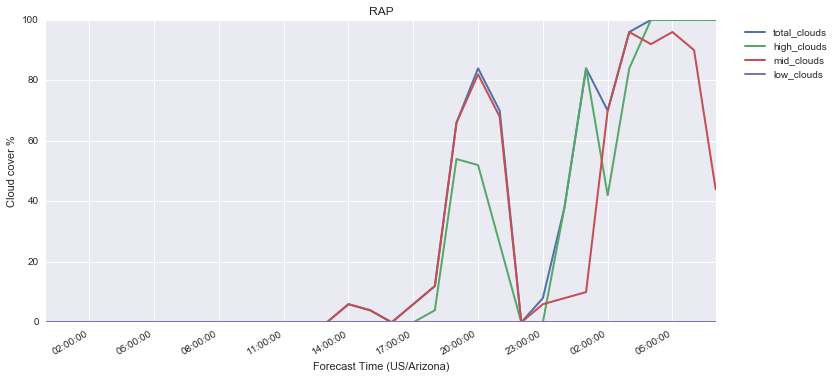

In [29]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [30]:
data

,temperature,wind_speed,total_clouds,low_clouds,mid_clouds,high_clouds,dhi,dni,ghi
2016-02-18 00:00:00-07:00,13.487732,3.068041,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 01:00:00-07:00,12.317657,3.017766,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 02:00:00-07:00,11.835938,3.168040,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 03:00:00-07:00,10.929230,3.353589,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 04:00:00-07:00,10.236389,3.583392,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 05:00:00-07:00,9.944611,3.329422,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 06:00:00-07:00,9.121063,3.434023,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 07:00:00-07:00,9.221222,3.934969,0,0,0,0,0.000000,0.000000,0.000000
2016-02-18 08:00:00-07:00,14.331787,3.221320,0,0,0,0,59.221272,301.390004,115.053768
2016-02-18 09:00:00-07:00,20.885101,1.599202,0,0,0,0,82.097308,638.076581,321.648625


## HRRR

In [31]:
fm = HRRR()

In [32]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

In [33]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

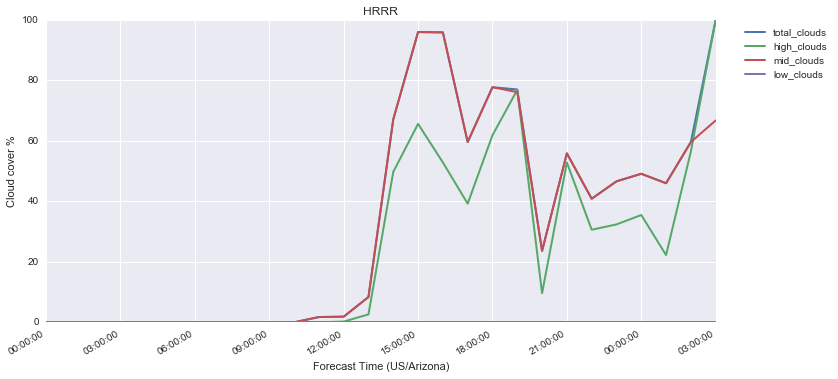

In [34]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [35]:
data

,temperature,wind_speed,total_clouds,low_clouds,mid_clouds,high_clouds,dhi,dni,ghi
2016-02-18 00:00:00-07:00,14.558868,4.402536,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 01:00:00-07:00,12.147003,5.494945,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 02:00:00-07:00,11.480347,5.440288,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 03:00:00-07:00,NaN,6.185889,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 04:00:00-07:00,10.089600,5.327294,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 05:00:00-07:00,10.123535,4.824394,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 06:00:00-07:00,9.428864,4.465015,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 07:00:00-07:00,9.707550,4.535923,0.000,0,0.000,0.000,0.000000,0.000000e+00,0.000000
2016-02-18 08:00:00-07:00,10.047699,4.843648,0.000,0,0.000,0.000,59.221272,3.013900e+02,115.053768
2016-02-18 09:00:00-07:00,11.528351,3.679283,0.000,0,0.000,0.000,82.097308,6.380766e+02,321.648625


## HRRR (ESRL)

In [36]:
fm = HRRR_ESRL()

/Users/holmgren/git_repos/pvlibfx/pvlib-python/pvlib/forecast.py:553: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  warnings.warn('HRRR_ESRL is an experimental model and is not always available.')


In [37]:
# retrieve data
data = fm.get_query_data(latitude, longitude, start, end)

HTTPError: Error accessing http://thredds-jumbo.unidata.ucar.edu/thredds/ncss/grib/HRRR/CONUS_3km/surface/Best?var=High_cloud_cover_UnknownLevelType-234&var=Low_cloud_cover_UnknownLevelType-214&var=Medium_cloud_cover_UnknownLevelType-224&var=Total_cloud_cover_entire_atmosphere&var=Wind_speed_gust_surface&var=Temperature_surface&var=Downward_short-wave_radiation_flux_surface&time_start=2016-02-18T07%3A00%3A00%2B00%3A00&time_end=2016-02-25T07%3A00%3A00%2B00%3A00&latitude=32.2&longitude=-110.9&vertCoord=100000&accept=netcdf: Requested time range 2016-02-18T07:00:00Z - 2016-02-25T07:00:00Z does not intersect actual time range 2016-01-13T14:00:00Z - 2016-02-03T18:24:00Z

In [ ]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [ ]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')